In [1]:
%matplotlib widget
import numpy as np 
from scipy import constants as c 
import matplotlib.pyplot as plt 
from scipy import signal as sig  
from matplotlib.widgets import Slider,Button 

#Introductions 

In [45]:
def kspace(N,c,dx):
    k = []
    for i in range(N-1):
        if(np.floor(i/(c*dx*N))%2==0):
            k.append(np.pi*(i/(c*dx*N)-np.floor(i/(c*dx*N))))
        else:
            k.append(np.pi*(np.ceil(i/(c*dx*N))-(i/(c*dx*N))))
    return np.asarray(k)

0

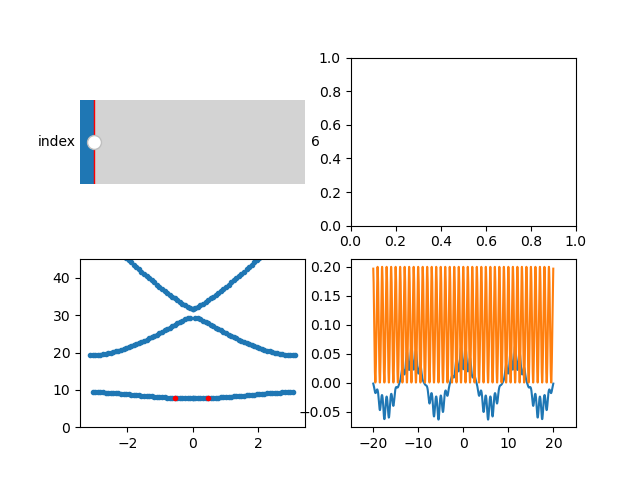

In [58]:

#Section 1
m = 1 ;hb = 1; w = 1 # define physical constants 

#section 2 
N = 1000 #  Number of steps
c = 1 # width of potential well 
L = 20*c #width of simulation window
a = -L; b =L #bounds of window
x = np.linspace(a,b,N+1) # generate x space 
dx = x[1]-x[0] #define differential step 

#Section 3 
E0 = hb/(dx**2)*(-2*np.eye(N-1)+np.diag(np.ones(N-2),1)+np.diag(np.ones(N-2),-1))#define differential matrix  


v0 = (1/2/m*w*x) 
v = np.diag(v0[1:-1])
v1 = 10*(1+np.cos(2*np.pi/c*x))#+(1+sig.square(2*np.pi/c*x,duty=.5,))*np.heaviside(x,0)*np.heaviside(c*7-x,0)
V = np.diag(v1[1:-1])
H1 = -E0/2/m*hb 
H = -E0/2/m*hb+V

#section 4
D1,fx1 = np.linalg.eig(H1)
D,fx2 = np.linalg.eig(H)
n = np.arange(1,N)
E00 =(np.pi/L*n)**2 
idx = D.argsort()[-N::]
D  =  D[idx]
fx2 = fx2[:,idx]
k = kspace(N,c,dx)
k = np.append(k,-kspace(N,c,dx))
D = np.append(D,D)
#section 5
fig,ax= plt.subplots(2,2)
ax[1,0].plot(k,D,'.')
indicator, = ax[1,0].plot([k[6],k[6+N]],[D[6],D[6+N]],'.',color='r') 
ax[1,0].set_ylim(0,45)
eigplot, = ax[1,1].plot(x[1:-1],fx2[:,6]) 
ax[1,1].plot(x[1:-1],.01*v1[1:-1])
ax[1,1].set_xlim(-25*c,25*c)
# Make a horizontal slider to control the frequency.
index_slider = Slider(
    ax=ax[0,0],
    label='index',
    valmin=0,
    valmax=100,
    valinit=6,
    valstep=1
)
def update(val):
    index = index_slider.val
    eigplot.set_ydata(fx2[:,index])
    indicator.set_ydata([D[index]])
    indicator.set_xdata([k[index]])
    fig.canvas.draw_idle()

index_slider.on_changed(update)

## First section: 
Define constants to be 1 (electron mass hbar etc) 

## Second section: 
Generate the x space for the potential 

## Third section : Define the following matrices
 
### 1st the second order differential matrix for the kinetic energy term   
$$ E_0 = hb/dx^2*(-2*np.eye(N-1))+np.diag(np.ones(N-2),1)+np.diag(np.ones(N-2),-1)$$
$$ =\frac{\hbar}{dx^2 }  
        \begin{pmatrix}
        2 & 1 & 0 & ...\\
        1 & 2 & 1 & ...\\
        0 & 1 & 2 & ...\\ 
        ... & ... & ... & ...\\ 
        
        \end{pmatrix}
$$ 
Is the 100x100 finite difference matrix expression of a differentail element


### 2nd we create the potential equation 
$$ v1 = 10*np.cos(2*np.pi/c*x) = 10*Cos(\frac{2*\pi}{c}*x) $$
$$ V = np.diag(v1[2:-1]) = $$ 
$$ \begin{pmatrix}
        v1(x_1) & 0      & 0        & ...\\
        0       &v1(x_2) & 0        & ...\\
        0       & 0      & v1(x_3)  & ...\\ 
        ...     & ...    & ...      & ...\\ 
        
        \end{pmatrix}
$$ 
### 3rd we finally define the hamiltonain 
$$ H =  -E0/2/m*\hbar+V $$ 
Which is equivalent to: 
$$H = \frac{1}{2*m*\hbar}\frac{d}{dx} + V $$

### 4th solve for the eigen vectors of the hamiltonian 

The eig method takes a given matrix and finds its eigen vectors and values so the following:  
 
$$ D,fx2 = np.linalg.eig(H)$$

Will take the following equation to find the equation eigen solutions or solutions for which E is a constant 
       $$ H\cdot \vec{f}_2(\vec{x}) = E*\vec{f}_2(\vec{x}) $$ 
This solution takes place in what is effectively wave number space so the X space of the energy will now be given in increments in the frequency domain 
we also note from the bloch equations that the equations will be periodic in wave number so they should wrap backwards with the period of the array 

In [40]:
for i in range(20):
    print(np.)

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7
2.8
2.9
